## 06-04 : Ensemble (앙상블)
1. 목적
    - 여러개의 분류기의 예측을 결합하여 보다 정확한 최종 예측을 도출하는 기법  
    

2. 주요 활용분야
    - 정형 데이터 분류시에 강력한 성능발휘
        - 반대로, 비정형 데이터(이미지, 영상, 음성 등)에서는 딥러닝이 주로 사용

3. 학습 유형
    - Voting
        > from sklearn.ensemble improt VotingClassifier
        - 동작방식
            - 같은 data set 을 여러가지 알고리즘으로 분석 후 결정
        - 결정 방식
            - Hard voting
                - 다수결로 결정
            - Soft voting
                - 평균으로 결정
    - Bagging
        > from sklearn.ensemble import RandomForestClassifier
        - 동작 방식
            - 분할 방식
                - boostrapping (랜덤으로 만들어 지는 서브 데이터 셋)
                - data set 을 지정한 크기(max_feature)로 다양한 데이터셋(중복OK, 랜덤) 생성
        - 결정 방식
            - 지정한 학습기의 수량(n_estimator)으로 병렬 학습
            - Soft voting (평균)
    - Boosting
        - AdaBoost
            - 동작방식
                - 여러개의 약학 학습기를 순차적으로 학습/검증 하며 데이터에 가중치를 부여하여 오류를 개선해나가는 방식
            - 가중치 부여 방식
                - ?
        - GBM (Gradient Boosting Machine)
            > from sklearn.ensemble import GradientBoostingClassifier
            - 동작방식
                - 여러개의 약학 학습기를 순차적으로 학습/검증 하며 데이터에 가중치를 부여하여 오류를 개선해나가는 방식
            - 가중치 부여 방식
                - Gradient Descent (경사하강법)
                - 회귀 계산의 주요방법
        - XGBoost
            - 분할 방식
                - Level wise (균형 트리 분할)
                    - 트리 분할 최소화 (depth level 최소화)
            - 호출 방식
                - Python wrapper
                    > import xgboost as xgb
                - Scikit-Learn wrapper
                    > from xgboost import XGBoostClassifier
            - 
        - LightGBM
            - 분할 방식
                - 리프중심 트리 분할(Leaf wise)
                    - 목적 : 단일 노드들의 예측오류를 최소화 하는방향으로 학습
                    - 단점
                        - 단일 학습 시 지나친 학습 (depth level X)
                    - 장점
                        - 방복 학습 시 예측오류 손실 최소화 가능
                        - 더 빠른 학습
                        - 더 작은 메모리 사용량
                        - 카테고리형 피처의 자동 변환과 최적 분활
                            - One-hot Encoding 을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른노드 분할 수행
            - 호출 방식
                > from lightgbm import LGBMClassifier
            - 하이퍼 파라미터 (scikit learn wrapper)
                - n_estimator[ default = 100 ] : 약한 학습기의 반복 수행 횟수
                - learning_rate[ default = 0.1 ] : 0 ~ 1 값을 설정하여 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값
                - max_depth [ default = 1 ] : 트리의 최대 깊이
                - min_child_samples [ default = 20 ] : 리프노드가 될 수 있는 최소 데이터 수
                - subsample : 트리가 커져서 과적합 되는 것을 제어하기 위해 데이터를 샘플링 하는 비율을 지정
                    - ex) subsample = 0.5 는 전체 데이터(row)에서 0.5 만큼만 트리를 생성(학습) 하는데 사용
                - colsample_bytree : GBM 의 max_feature 와 유사. 트리 생성에 필요한 피처(column)을 임의로 샘플링 하는데 사용됩니다.
                    - 과적합을 조정하기 위해 사용됨
            - Feature Importance
                > from lightgbm import plot_importance
        - AdaBoost
    - Stacking

4. 하이퍼 파라미터 수행 기법
- Grid Search
    - 특징 및 단점
        - Gradien Boosting 기반 알고리즘은 튜닝해야할 하이퍼 파라미터 알고리즘 개수가 많고 범위가 넓어서 가능한 경우의 수가 너무 많음
        - 이러한 경우의 수가 많은 경우 데이터가 크면 하이퍼 파라미터 튜닝에 굉장히 오랜 시간이 투입되어야함
- Random Search
- Baysian Optimization
    - 목적
        - 가능한 최소의 시도로 최적의 답을 찾아야 할 경우
        - 개별 시도가 너무 많은 시간 자원을 필요로 할때
    - 원리
        - 구성요소
            - 대체 모델 (Surrogate Model)
            - 획득 함수 (Acquisition Function)
        - 동작 순선
            1. 대체모델 -> 획득함수 예측
            2. 대체모델 + 획득함수 -> 최적함수 모델 개선
            3. 최적함수모델 -> 최적 입력값 예측
            4. 최적 입력값 + 최적함수모델 -> 최적함수 개선 (반복)
    - 주요 패키지
        - HyperOpt
            - 사용방법
                - 호출
                    > from hyperopt import hp
                - Search Space (입력값 범위)
                - 목적 함수
        - Baysianoptimization
        - Optuna
- Manual Optimization

### 01 : Voting

위스콘신 유방암 데이터

#### 01. Setting

In [2]:
# Basic Library
import numpy as np
import pandas as pd
import sklearn
from IPython.display import display

# 앙상블 voting
from sklearn.ensemble import VotingClassifier

# ML model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# split model
from sklearn.model_selection import train_test_split

# scoring metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# data set
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['label'] = cancer.target
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


#### Analysis

In [3]:
# ML model 객체 생성
lg_rgs = LogisticRegression(max_iter = 3000)
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 soft voting 기반 Ensemble 로 구현한 분류기
vot_clf = VotingClassifier( estimators = [('LR', lg_rgs), ('KNN', knn_clf)], voting = 'soft')

# train/test split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# VotingClassifier 학습/검증/평가
vot_clf.fit(X_train, y_train)
vot_pred = vot_clf.predict(X_test)
vot_score = accuracy_score(y_test, vot_pred)
print('{:>25} 정확도 : {:.4} %'.format('Voitng Classifier',vot_score * 100))

# 각 ML 학습/검증/평가 결과 비교
classifiers = [lg_rgs, knn_clf]
for classifier in classifiers :

    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    score = accuracy_score(y_test, pred)

    class_name = classifier.__class__.__name__

    print('{:>25} 정확도 : {:.4} %'.format(class_name, score * 100))

        Voitng Classifier 정확도 : 94.74 %
       LogisticRegression 정확도 : 96.49 %
     KNeighborsClassifier 정확도 : 93.86 %


### 02 : Bagging

RandomForest Classifier Ensemble EX

    from sklearn.ensemble import RandomForestClassifier

Setting

In [4]:
# Basic Library
import numpy as np
import pandas as pd
import sklearn
from IPython.display import display

# ML model
    # Ensemble model (Bagging)
from sklearn.ensemble import RandomForestClassifier

# scoring metric
from sklearn.metrics import accuracy_score

# split data
from sklearn.model_selection import train_test_split

# etc
import warnings
warnings.filterwarnings('ignore')

Data load/ Feature Engineering

In [5]:
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])\
                                                                                                 if x[1] > 0 else x[0], axis =1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis =1)

    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_df = pd.read_csv('./human_activity/features.txt',sep='\s+', header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

Basic RandomForest(Bagging-Ensemble) Test

In [6]:
# ML model 객체 생성
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 8)

# ML model 학습/검증/평가
rf_clf.fit(X_train, y_train)
basic_pred = rf_clf.predict(X_test)
basic_score = accuracy_score(y_test, basic_pred)
print('랜덤 포레스트 정확도 : {:.4} %'.format(basic_score * 100))

랜덤 포레스트 정확도 : 91.96 %


Find Best Parameter

In [7]:
from sklearn.model_selection import GridSearchCV

# parameter setting
params = {
    'max_depth' : [8, 6, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

# Hyper parmeter tune 객체 생성
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
    # n_jobs
        # 1 : 1core
        # -1 : 모든 코어
grid_cv = GridSearchCV(rf_clf, param_grid = params, scoring = 'accuracy', cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train.values.ravel())

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최적 정확도 : {:.4} %'.format(grid_cv.best_score_ * 100))

최적 하이퍼 파라미터 : 
 {'max_depth': 24, 'min_samples_leaf': 6, 'min_samples_split': 2}
최적 정확도 : 91.62 %


Predict with best param

In [8]:
# best parameter tune
best_grid_cv = grid_cv.best_estimator_

# predict
best_grid_pred = best_grid_cv.predict(X_test)

# accuracy
best_gird_score = accuracy_score(y_test, best_grid_pred)
print('랜덤 포레스트 GridSearchCV 예측 정확도 : {:.4} %'.format(best_gird_score * 100))

랜덤 포레스트 GridSearchCV 예측 정확도 : 92.43 %


Feature Importance

In [9]:
# Feature Importance 추출
feature_importance = best_grid_cv.feature_importances_

# ndarray -> DF
feature_importance_df = pd.DataFrame(feature_importance, index = X_train.columns)

# 내림차순 정렬
feature_importance_df.sort_values(by = 0, ascending = False, inplace = True)

# column name change
feature_importance_df.rename(columns = {0:'importance'}, inplace = True)

# Top20
ft_importance_top20 = feature_importance_df[:20]

display(ft_importance_top20.head(3))

,importance
"angle(X,gravityMean)",0.036160
tGravityAcc-mean()-Y,0.033813
tGravityAcc-min()-X,0.030566


Feature Impt Plotting

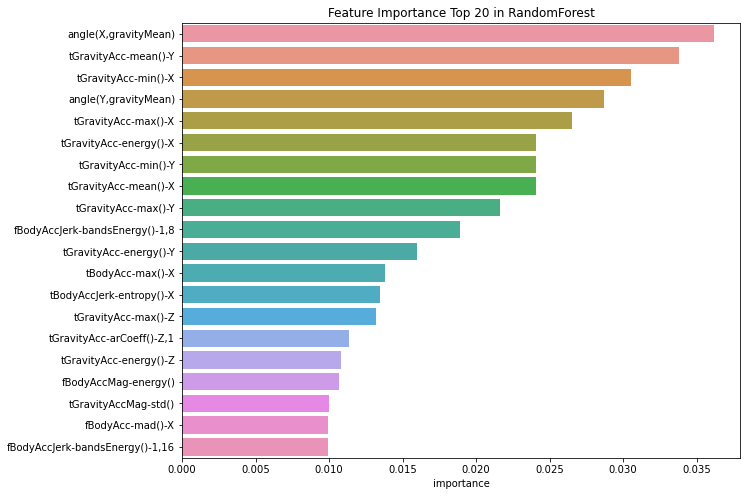

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,8))
plt.title('Feature Importance Top 20 in RandomForest')
sns.barplot(x = ft_importance_top20['importance'], y = ft_importance_top20.index)
plt.show()

### 03 : GBM (Gradient Boosting Machine)
- 여러개의 약한 학습기(weak learner) 를 순차적으로 학습/예측 하면서 잘못 예측한 데이터나 트리에 가중치를 부여를 통해 오류를 개선해 나가면서 학습해 나가는 방식
- 대표 model
    - AdaBoost
    - GBM(Gradiant Boost Machine) 그래디언트 부스트
    - XGBoost
    - LightGBM
- 단점
    - Bagging 은 병렬도 학습을 진행하는것과 달리 Boosting 은 순차적으로 학습을 진행하기 때문에 시간이 오래걸릴 수 있다

Setting

In [11]:
# Basic Library
import numpy as np
import pandas as pd
import sklearn
from IPython.display import display

# ML model
    # Ensemble model (Bagging)
from sklearn.ensemble import GradientBoostingClassifier

# scoring metric
from sklearn.metrics import accuracy_score

# split data
from sklearn.model_selection import train_test_split

# etc
import warnings
warnings.filterwarnings('ignore')

Data load/ Feature Engineering

In [12]:
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])\
                                                                                                 if x[1] > 0 else x[0], axis =1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis =1)

    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_df = pd.read_csv('./human_activity/features.txt',sep='\s+', header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

GBM Test
- 너무 느려서 작은 데이터 임에도 하이퍼파라미터 튜닝이건 뭐건 더이상 진행이 어렵다

In [13]:
# 수행시간 측정을 위함
    # 시작시간 설정
import time

start_time = time.time()

gbm_clf = GradientBoostingClassifier(random_state = 0)
gbm_clf.fit(X_train, y_train)
gbm_pred = gbm_clf.predict(X_test)
gbm_score = accuracy_score(y_test, gbm_pred)

print('GBM 정확도 : {:.4} %'.format(gbm_score * 100))
print('GBM 측정 소요시간 : {:.1f} 초'.format(time.time() - start_time))

GBM 정확도 : 93.86 %
GBM 측정 소요시간 : 475.0 초


### 04 : XGBoost (Python)

#### 주요장점
- 뛰어난 예측성능
    - 분류
    - 회귀
- GBM 대비 빠른 수행시간
    - 병렬 CPU 처리
    - GPU 지원 (Window NVidia 한정)
        - LightGBM , 다른 앙상블 계열보단 느림
- 다양한 성능 향상 기능
    - 규제(Regulrization) 기능 탑재
    - Tree Pruning
- 다양한 편의 기능
    - 조기 중단 (Early Stopping)
    - 자체 내장된 교차 검증
    - 결손값 자체 처리

#### Setting

In [54]:
# Basic Library
import pandas as pd
import numpy as np
import sklearn

# Python wrapper module
import xgboost as xgb
from xgboost import plot_importance
print(xgb.__version__)

# Data split
from sklearn.model_selection import train_test_split

# DATA
from sklearn.datasets import load_breast_cancer

# etc
import warnings
warnings.filterwarnings('ignore')

1.5.1


#### DATA Load

In [55]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df['label'] = cancer.target
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [56]:
print(cancer.target_names)
display(cancer_df['label'].count())
display(cancer_df['label'].value_counts())

['malignant' 'benign']


569

1    357
0    212
Name: label, dtype: int64

In [57]:
# featrue / label DATA set 별도생성
f_df = cancer_df.iloc[:,:-1]
l_df = cancer_df.iloc[:,-1]

# DATA split (학습/검증 + 테스트)
X_train, X_test, y_train, y_test = train_test_split(f_df, l_df, test_size = 0.2, random_state = 156)

# DATA split (학습 + 검증)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)


(455, 30) (114, 30)
(409, 30) (46, 30)


#### DMatrix
- ndarray , DF 둘다 DMatrix 로 변환이 가능하다

In [58]:
# 학습
dtr = xgb.DMatrix(data = X_tr, label = y_tr)
# 검증
dval = xgb.DMatrix(data = X_val, label = y_val)
# 테스트
dtest = xgb.DMatrix(data = X_test, label = y_test)

#### Train (Fit)

Hyper parameter (Dict)

In [59]:
costom_params = {'max_depth' : 3,
                 'eta' : 0.05,     # learning_rate : 학습률
                 'objective' : 'binary:logistic',    # 손실함수 정의
                    # binary:logistic = 이진분류
                    # multi:softmax = 다중분류
                    # multi:softprob = 다중분류와 비슷? 설명참조
                 'eval_metric' : 'logloss'    # 검증에 사용되는 함수 정의
                }

# n_estimator : boosting 횟수
num_rounds = 400

# 학습 (train) 검증 (eval) 로 명기됨
eval_list = [(dtr, 'train'), (dval, 'eval')]
# eval_list = [(dval, 'eval')] 라고 해도 무방

early stopping round setting & fit

In [60]:
xgb_model = xgb.train(params = costom_params, dtrain = dtr, num_boost_round = num_rounds, early_stopping_rounds = 70, evals = eval_list)
    # params                 : 파라미터 지정
    # dtrain                 : train(학습) DATA DMatrix 지정 (X_tr, y_tr)
    # num_boost_round        : n_estimator 즉, 부스팅 횟수 지정
    # early_stopping_rounds  : 몇회이상 Loss 개선이 없을 시 boosting 멈출지 지정
    # evals                  : eval(검증) DATA DMatrix 지정 (X_val, y_val)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

#### Predict
- scikit-learn 의 predict_proba[:,-1] 와 동일한 확률값을 출력한다

predict_proba

In [61]:
pred_probs = xgb_model.predict(dtest)
print('.predict() 수행 결과값을 10개 만 출력')
print(np.round(pred_probs[:10],3))

.predict() 수행 결과값을 10개 만 출력
[0.851 0.007 0.69  0.07  0.976 0.999 0.999 0.999 0.997 0.001]


get pred

In [62]:
# pred_proba -> pred 변환 함수
def make_preds(pred_probs) :
    preds = []
    for i in pred_probs :
        if i >= 0.5 :
            pred = 1
        else :
            pred = 0
        preds.append(pred)
    return preds

preds = make_preds(pred_probs)
print('예측값 10개만 출력', preds[:10])

예측값 10개만 출력 [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


#### Accuracy

In [63]:
score = accuracy_score(y_test, preds)
print('XGBoosting 정확도 : {:.4} %'.format(score * 100))

XGBoosting 정확도 : 95.61 %


#### Feature Importance

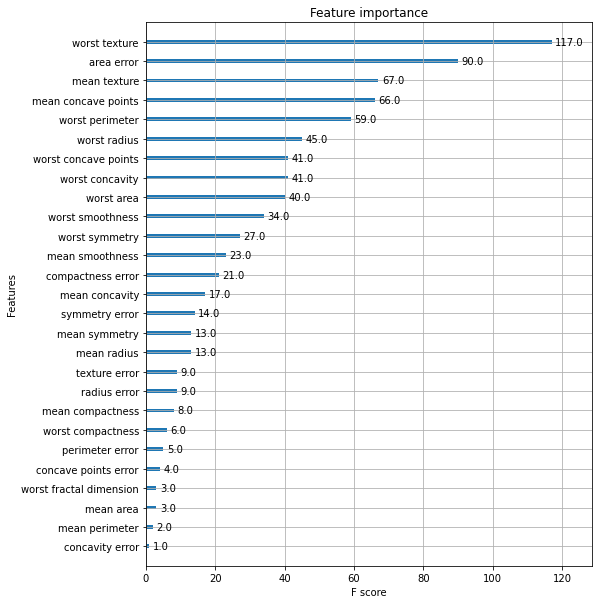

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (8, 10))
plot_importance(xgb_model, ax = ax)
plt.show()

### 05 : XGBoost (Scikit-Learn)

#### Setting

In [65]:
# Basic Library
import numpy as np
import pandas as pd
import sklearn
from IPython.display import display

# Esimator
    # import xgboost : Python wrapper
    # from xgboost import XGBoClassifier : Sckitlearn wrapper
from xgboost import XGBClassifier

# Data split
from sklearn.model_selection import train_test_split

# DATA
from sklearn.datasets import load_breast_cancer

# etc
import warnings
warnings.filterwarnings('ignore')

#### DATA Load

In [66]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['label'] = cancer.target
X_df = cancer_df.iloc[:,:-1]
y_df = cancer_df.iloc[:,-1]

#### Split DATA

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 156)

#### XGBoost (ML)

Estimator load & Hyper parameter

In [68]:
# Warning 메세지를 없애기 위해 eval_metric 값을 XGBClassifier 생성인자로 입력
xgb_clf = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3, eval_metric = 'logloss')

Fit

In [69]:
xgb_clf.fit(X_train, y_train, verbose = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Predict

In [70]:
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba_cl1 = xgb_clf.predict_proba(X_test)[:,-1]

Accuracy

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred, pred_proba) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차행렬')
    confusion_df = pd.DataFrame(confusion)
    display(confusion_df)
    print('Accuracy  : {:>.2f} %'.format(accuracy * 100))
    print('Precision : {:>.2f} %'.format(precision * 100))
    print('Recall    : {:>.2f} %'.format(recall * 100))
    print('F1        : {:>.2f} %'.format(f1 * 100))
    print('AUC       : {:>.2f} %'.format(roc_auc * 100))

In [72]:
get_clf_eval(y_test, xgb_pred, xgb_pred_proba_cl1)

오차행렬


,0,1
0,34,3
1,1,76


Accuracy  : 96.49 %
Precision : 96.20 %
Recall    : 98.70 %
F1        : 97.44 %
AUC       : 99.54 %


#### Early Stopping - 1

DATA split

In [73]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)
evals = [(X_tr, y_tr),(X_val, y_val)]

Hyper parameter /Fit / Predict / Accuracy

In [74]:
from xgboost import XGBClassifier

# 객체 생성 및 파라미터 셋팅
xgb_clf_stop50 = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3, eval_metric = 'logloss')

# train 데이터 학습 및 eval 데이터 매칭 
xgb_clf_stop50.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_set = evals, verbose = True)
xgb_stop50_pred = xgb_clf_stop50.predict(X_test)
xgb_stop50_pred_proba_cl1 = xgb_clf_stop50.predict_proba(X_test)[:,-1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [75]:
get_clf_eval(y_test, xgb_stop50_pred, xgb_stop50_pred_proba_cl1)

오차행렬


,0,1
0,34,3
1,2,75


Accuracy  : 95.61 %
Precision : 96.15 %
Recall    : 97.40 %
F1        : 96.77 %
AUC       : 99.33 %


#### Early Stopping - 2

Hyper parameter /Fit / Predict / Accuracy

In [76]:
from xgboost import XGBClassifier

# 객체 생성 및 파라미터 셋팅
xgb_clf_stop10 = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3, eval_metric = 'logloss')

# train 데이터 학습 및 eval 데이터 매칭 
xgb_clf_stop10.fit(X_tr, y_tr, early_stopping_rounds = 10, eval_set = evals, verbose = True)
xgb_stop10_pred = xgb_clf_stop10.predict(X_test)
xgb_stop10_pred_proba_cl1 = xgb_clf_stop10.predict_proba(X_test)[:,-1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [77]:
get_clf_eval(y_test, xgb_stop10_pred, xgb_stop10_pred_proba_cl1)

오차행렬


,0,1
0,34,3
1,3,74


Accuracy  : 94.74 %
Precision : 96.10 %
Recall    : 96.10 %
F1        : 96.10 %
AUC       : 99.33 %


#### Plot -1 (visualizing)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

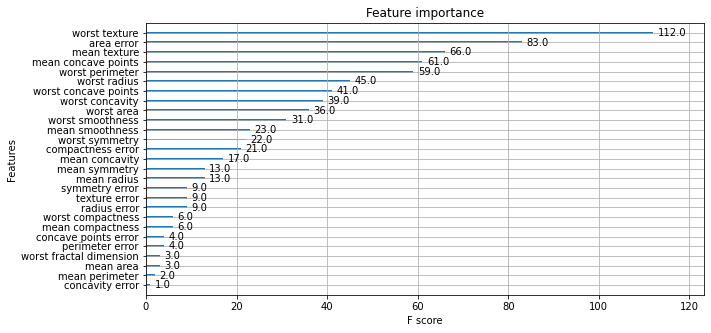

In [78]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,5))
# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_clf_stop50, ax=ax)

#### Plot -2 (visualizing)

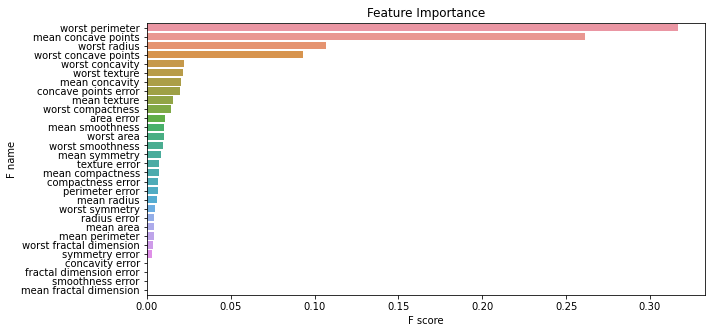

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f_importance = xgb_clf_stop50.feature_importances_
f_importance_df = pd.DataFrame(f_importance)
f_importance_df.index = X_train.columns
f_importance_df.sort_values(by = 0, ascending=False, inplace=True)
f_importance_df.rename(columns = {0 : 'F score'}, inplace=True)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.ylabel('F name')
sns.barplot(x = f_importance_df['F score'], y=f_importance_df.index)
plt.show()

#### Feature Importance
- Gain / total gain
    - .feature_importance_ 함수의 기본타입
    - 해당 feature 가 모델 예측에 어느정도 영향을 미쳤는지 정도
        - 노드가 해당 feature 로 부터 분기되었을때 얻은 성능상의 이득
    - Gain : 전체 노드의 평균
    - Total gain : Gain 의 총합

- Cover / total cover
    - 해당 feature 와 관련된 상대적인 개수

- Weight
    - plot_importance 함수의 기본값
    - 해당 feature 가 노드 분기에 사용된 횟수

Text(0, 0.5, 'Features')

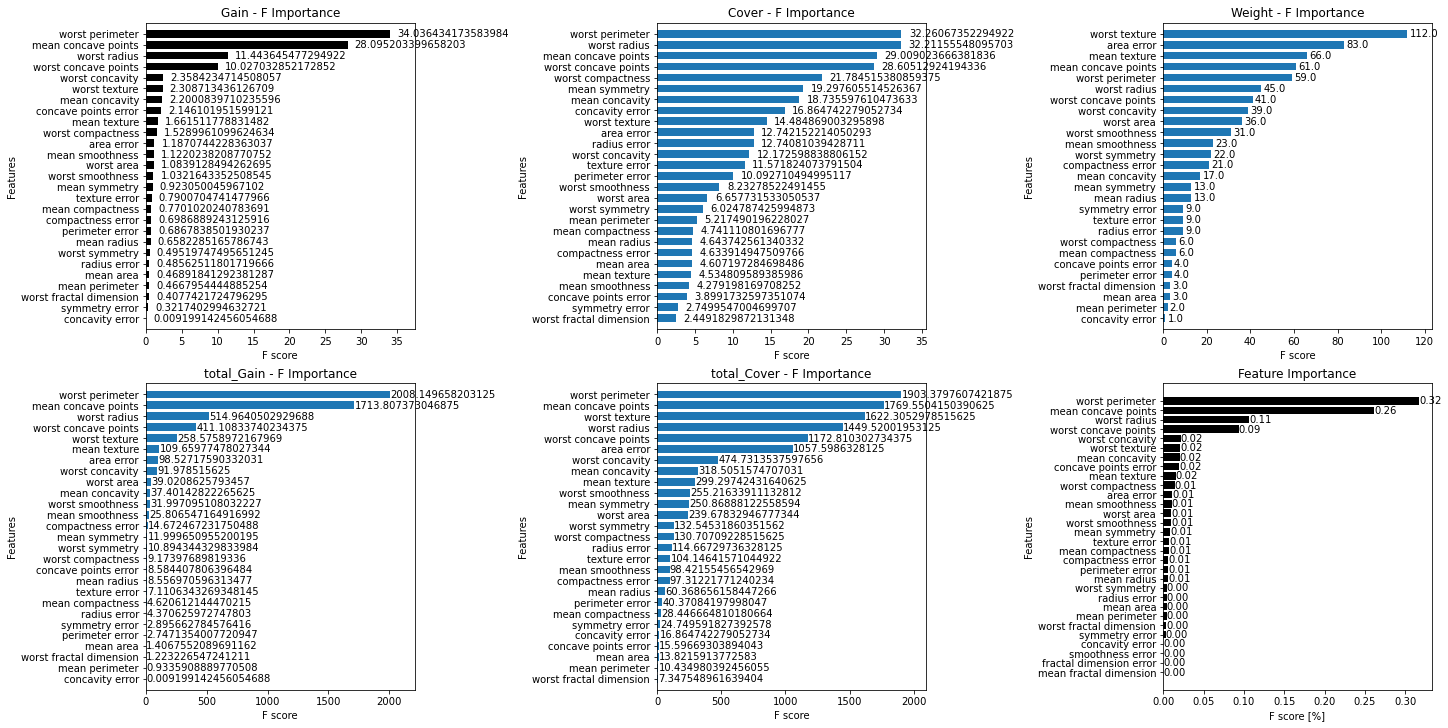

In [80]:
f_importance_df.sort_values(by='F score', ascending=True, inplace=True)

fig, ax = plt.subplots(2,3, figsize = (20, 10),constrained_layout=True)

plot_importance(xgb_clf_stop50, importance_type= 'gain', title = 'Gain - F Importance', height=0.7, grid = False, ax=ax[0,0], color = 'Black')
plot_importance(xgb_clf_stop50, importance_type= 'cover', title = 'Cover - F Importance', height=0.7, grid = False, ax=ax[0,1])
plot_importance(xgb_clf_stop50, importance_type= 'weight', title = 'Weight - F Importance', height=0.7, grid = False, ax=ax[0,2])
plot_importance(xgb_clf_stop50, importance_type= 'total_gain', title = 'total_Gain - F Importance', height=0.7, grid = False, ax=ax[1,0])
plot_importance(xgb_clf_stop50, importance_type= 'total_cover', title = 'total_Cover - F Importance', height=0.7, grid = False, ax=ax[1,1])


ax1 = plt.barh(f_importance_df.index, f_importance_df['F score'], color = 'Black')
ax[1,2].bar_label(ax1, fmt='%.2f')
ax[1,2].set_title('Feature Importance')
ax[1,2].set_xlabel('F score [%]')
ax[1,2].set_ylabel('Features')

### 06 : LightGBM

#### Setting

In [98]:
# Basic Lib
import numpy as np
import pandas as pd
import sklearn
from IPython.display import display

# Estimator
import lightgbm
from lightgbm import LGBMClassifier

# Data split
from sklearn.model_selection import train_test_split

# DATA
from sklearn.datasets import load_breast_cancer

# etc
import warnings
warnings.filterwarnings('ignore')

#### DATA Load

In [99]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['label'] = cancer.target
X_df = cancer_df.iloc[:,:-1]
y_df = cancer_df.iloc[:,-1]

display(cancer_df.head(3))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


#### Split DATA

In [100]:
# 학습(합습 + 검증) 80% + 평가 20% = 100%
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 156)
 
# 학습 72% + 검증 8% = 80%
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)


#### LightGBM

In [101]:
# n_estimator : XGBoost 와 동일하게
lgbm = LGBMClassifier(n_estimators = 400, learning_rate = 0.05 )

# early_sttoping_rounds : XGBoost 와 동일하게
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss', eval_set = evals, verbose = True)
lgbm_pred = lgbm.predict(X_test)
lgbm_pred_proba_cl1 = lgbm.predict_proba(X_test)[:,-1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

#### Get clf eval

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred, pred_proba) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차행렬')
    confusion_df = pd.DataFrame(confusion)
    display(confusion_df)
    print('Accuracy  : {:>.2f} %'.format(accuracy * 100))
    print('Precision : {:>.2f} %'.format(precision * 100))
    print('Recall    : {:>.2f} %'.format(recall * 100))
    print('F1        : {:>.2f} %'.format(f1 * 100))
    print('AUC       : {:>.2f} %'.format(roc_auc * 100))

In [103]:
get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba_cl1)

오차행렬


,0,1
0,34,3
1,2,75


Accuracy  : 95.61 %
Precision : 96.15 %
Recall    : 97.40 %
F1        : 96.77 %
AUC       : 98.77 %


#### Feature Importance
- feature importance 5가지 종류
    - gain / total_gain
    - weight
    - cover / total_cover

    plot_importance( estimator )
- [ deafault = 'weight' ]   

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

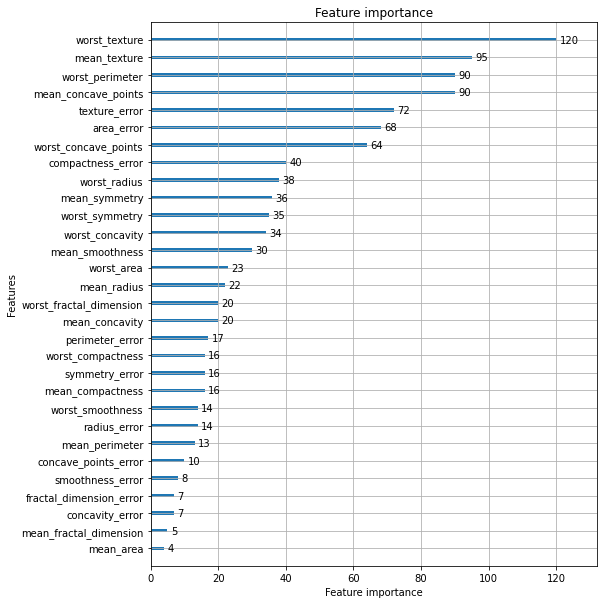

In [132]:
from lightgbm import plot_importance

import matplotlib.pyplot as plt
%matplotlib inline

fix, ax = plt.subplots(figsize = (8, 10))
plot_importance(lgbm, ax = ax)

A.feature_importances_
- [ 'gain' ]

[ 22  95  13   4  30  16  20  90  36   5  14  72  17  68   8  40   7  10
  16   7  38 120  90  23  14  16  34  64  35  20]


,F imortance % [Gain]
mean area,4
mean fractal dimension,5
fractal dimension error,7


Text(0, 0.5, 'Features')

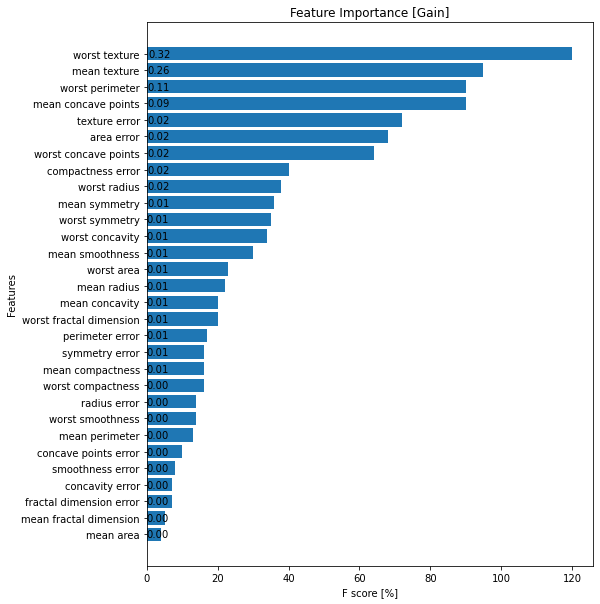

In [136]:
f_impt = lgbm.feature_importances_
print(f_impt)
f_impt_df = pd.DataFrame(f_impt)
f_impt_df.index = X_train.columns
f_impt_df.sort_values(by = 0, ascending = True , inplace = True)
f_impt_df.rename(columns = {0:'F imortance % [Gain]'}, inplace = True)
display(f_impt_df.head(3))

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (8, 10))
plt.barh(f_impt_df.index, f_impt_df['F imortance % [Gain]'])
plt.bar_label(ax1, fmt='%.2f')
plt.title('Feature Importance [Gain]')
plt.xlabel('F score [%]')
plt.ylabel('Features')

### 07 : HyperParams Tune Method

#### 01 - 종류
- GridSearchCV
- Random Search
- Baysian OPtimization
- Manual Optimization

#### 02 - HyperOpt

Import Pakage

In [63]:
from hyperopt import hp

Search Space

In [64]:
# x 입력 변수
    # -10 ~ 10 까지 1 간격을 갖는 집합
# y 입력 변수
    # -15 ~ 15 까지 1 간격을 갖는 집합

search_space = { 'x' : hp.quniform('x', -10,10,1), 'y' : hp.quniform('y', -15, 15, 1)}
search_space

{'x': <hyperopt.pyll.base.Apply at 0x17ec5f310>,
 'y': <hyperopt.pyll.base.Apply at 0x17ec5f190>}

목적 함수

In [65]:
from hyperopt import STATUS_OK

# 목적 함수를 생성
    # 입력 변수값과 입력 변수 검색 범위를 갖는 딕셔너리는 인자로 받고 특정 값을 반환하는 기능을 갖음

def object_func(search_space) :
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval
        # return { 'loss' : retval , 'status' : STATUS_OK }

HyperOpt setting

In [66]:
from hyperopt import fmin, tpe, Trials
import numpy as np

# 입력 결과값을 저장할 Trials 객체값 생성
trials_val = Trials()

# HyperOpt 하이퍼 파라미터 셋팅
best_01 = fmin(fn = object_func,        # 목적 함수
               space = search_space,    # 입력값 범위
               algo = tpe.suggest,      # 알고리즘 종류 (고정값이라고 생각하면 됨)
               max_evals = 5,           # 최적 입력값을 찾기위해 시도할 횟수
               trials = trials_val,     # 최적 입력값을 찾기위해 시도한 입력값 / 목적함수 반환값 을 저장할 공간
               rstate = np.random.default_rng(seed=0))  # random_state 와 동일 random 시드값

print(best_01)

100%|██████████| 5/5 [00:00<00:00, 1508.74trial/s, best loss: -224.0]
{'x': -4.0, 'y': 12.0}


In [67]:
# HyperOpt 하이퍼 파라미터 셋팅
best_02 = fmin(fn = object_func,        # 목적 함수
               space = search_space,    # 입력값 범위
               algo = tpe.suggest,      # 알고리즘 종류 (고정값이라고 생각하면 됨)
               max_evals = 20,           # 최적 입력값을 찾기위해 시도할 횟수
               trials = trials_val,     # 최적 입력값을 찾기위해 시도한 입력값 / 목적함수 반환값 을 저장할 공간
               rstate = np.random.default_rng(seed=0))  # random_state 와 동일 random 시드값

print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 1813.36trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


Trial Check

In [68]:
print(trials_val)

print(trials_val.results)
# fmin() 에 인자로 들어가는 Trails 객체의 result 속성에 Python 리스트로 목적 함수 반환값들이 저장됨
    # 리스트 내부의 개별 원소는 { 'loss' : 반환값 , 'status' : 반환 상태값 } 와 같은 딕셔너리 형태

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}]


In [69]:
print(trials_val.vals)
    # Trail 객체의 vals 속성에 {'입력 변수명' : 개별 수행 시마다 입력된 값 리스트} 형태로 저장됨

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, -6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0]}


In [70]:
import pandas as pd
from IPython.display import display


result1 = pd.DataFrame({'x' : trials_val.vals['x'],  'y' : trials_val.vals['y']})
result2 = pd.DataFrame(trials_val.results)

result_df = pd.concat((result1, result2), axis=1)
display(result_df)

,x,y,loss,status
0,-6.0,5.0,-64.0,ok
1,-4.0,10.0,-184.0,ok
2,4.0,-2.0,56.0,ok
3,-4.0,12.0,-224.0,ok
4,9.0,1.0,61.0,ok
5,-6.0,5.0,-64.0,ok
6,-4.0,10.0,-184.0,ok
7,4.0,-2.0,56.0,ok
8,-4.0,12.0,-224.0,ok
9,9.0,1.0,61.0,ok


###  08 : HyperOpt (XGBoost)

#### Setting

In [71]:
# Basic Lib
import numpy as np
import pandas as pd
import sklearn
from IPython.display import display

# Estimator / Hyper Param
from xgboost import XGBClassifier
from hyperopt import hp, STATUS_OK, fmin, tpe, Trials

# Data
from sklearn.datasets import load_breast_cancer

# Data split
from sklearn.model_selection import train_test_split

# etc
import warnings
warnings.filterwarnings('ignore')

#### DATA Load

In [72]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['label'] = cancer.target

X_df = cancer_df.iloc[:,:-1]
y_df = cancer_df.iloc[:,-1]

display(cancer_df.head(3))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


#### DATA Split

In [73]:
# 학습(합습 + 검증) 80% + 평가 20% = 100%
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 156)
 
# 학습 72% + 검증 8% = 80%
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)

#### Search Space (입력값)

In [93]:
from hyperopt import hp

# 기존의 XGBoost 하이퍼 파라미터 인자가 search space 인자가 된다
xgb_search_space = { 'max_depth' : hp.quniform('max_depth', 5, 20, 1),                  # tree 최대 깊이 설정
                     'min_child_weight' : hp.quniform('min_child_weight', 1, 2, 1),     # node 분할을 위한 데이터 weight 의 총합 
                     'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2),          # Boosting step 별 학습률                 # 0.01 ~ 0.02 정규분포
                     'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1)}       # 각 tree 마다 feature 의 sampling 비율    # 0.5 ~ 1 정규분포

#### 목적 함수

In [100]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def object_func(search_space) :
    # 수행시간을 단축하기 위해 n_estimator 는 100 으로 축소
    xgb_clf = XGBClassifier(n_estimators = 100,                                             # 약한 학습기 수                         : 100 개
                            max_depth = int(search_space['max_depth']),                 # tree 깊이 제한 범위                    : 5 ~ 20 간격 1 random
                            min_child_weight = int(search_space['min_child_weight']),    # tree 분할 weight 합 제한               : 1 or 2                            
                            learning_rate = search_space['learning_rate'],              # boosting 학습률                       : 0.01 ~ 0.02 정규분포 random
                            colsample_bytree = search_space['colsample_bytree'],        # 각 tree 마다 feature 의 sampling 비율   : 0.5 ~ 1 정규분포 random
                            eval_metric = 'logloss')

    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring = 'accuracy', cv = 3)

    return {'loss' : -1 * np.mean(accuracy), 'status' : STATUS_OK}
                    # HyperOpt 는 최소값을 찾는 Pakage 이기 때문에 -1 을 곱해준다

#### Get Param (HyperOpt)

In [101]:
from hyperopt import fmin, tpe, Trials

trials_val = Trials()   # 입력값 / 목적함수 저장공간 객체 생성

best = fmin(fn = object_func,                           # 목적 함수 지정 (XGBoost 하이퍼 파라미터 범위지정)
            space = xgb_search_space,                   # 입력값 점위 지정
            algo = tpe.suggest,                         # 알고리즘
            max_evals = 50,                             # 최대 반복 횟수 지정
            trials = trials_val,                        # 최적 입력값 / 획득 함수 저장 공간 지정
            rstate = np.random.default_rng(seed = 9))   # random_state 시드 값 지정

print('best :', best)

100%|██████████| 50/50 [00:27<00:00,  1.81trial/s, best loss: -0.9692401533635412]
best : {'colsample_bytree': 0.548301545497125, 'learning_rate': 0.1840281762576621, 'max_depth': 18.0, 'min_child_weight': 2.0}


In [104]:
print('colsample_bytree : {}, learning_rate : {}, max_depth : {}, min_child_weight : {}'
        .format(round(best['colsample_bytree'], 5), round(best['learning_rate'], 5), int(best['max_depth']), int(best['min_child_weight'])) )

colsample_bytree : 0.5483, learning_rate : 0.18403, max_depth : 18, min_child_weight : 2


#### XGBoosting

Get clf eval

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred, pred_proba) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차행렬')
    confusion_df = pd.DataFrame(confusion)
    display(confusion_df)
    print('Accuracy  : {:>.2f} %'.format(accuracy * 100))
    print('Precision : {:>.2f} %'.format(precision * 100))
    print('Recall    : {:>.2f} %'.format(recall * 100))
    print('F1        : {:>.2f} %'.format(f1 * 100))
    print('AUC       : {:>.2f} %'.format(roc_auc * 100))

Predict

In [110]:
xgb_wrapper = XGBClassifier(n_estimators = 400, 
                            learning_rate = round(best['learning_rate'], 5), 
                            max_depth = int(best['max_depth']), 
                            min_child_weight = int(best['min_child_weight']), 
                            colsample_bytree = round(best['colsample_bytree'], 5), 
                            eval_metric = 'logloss')

evals = [(X_tr, y_tr), (X_val, y_val)]

xgb_wrapper.fit(X_tr, y_tr)
pred = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,-1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬


,0,1
0,34,3
1,2,75


Accuracy  : 95.61 %
Precision : 96.15 %
Recall    : 97.40 %
F1        : 96.77 %
AUC       : 99.33 %


#### Check

In [114]:
losses = [loss_dict['loss'] for loss_dict in trials_val.results]
result_df = pd.DataFrame({'max_depth': trials_val.vals['max_depth'],
                          'min_child_weight': trials_val.vals['min_child_weight'],
                          'colsample_bytree': trials_val.vals['colsample_bytree'],
                          'learning_rate': trials_val.vals['learning_rate'],
                          'losses': losses
                         }
                        )
display(result_df.head(5),result_df.tail(5) )

,max_depth,min_child_weight,colsample_bytree,learning_rate,losses
0,19.0,2.0,0.585235,0.033688,-0.953889
1,5.0,2.0,0.727186,0.105956,-0.956068
2,6.0,2.0,0.959945,0.154804,-0.956082
3,6.0,2.0,0.950012,0.120686,-0.958275
4,16.0,2.0,0.674336,0.142392,-0.967047


,max_depth,min_child_weight,colsample_bytree,learning_rate,losses
45,18.0,2.0,0.745460,0.127683,-0.958261
46,5.0,1.0,0.568068,0.170144,-0.960483
47,7.0,2.0,0.620420,0.107967,-0.962661
48,12.0,1.0,0.991729,0.138113,-0.947267
49,9.0,2.0,0.792294,0.074424,-0.960483


### 09 : HyperOpt EX